In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# id: 6-6-6  

# (a)

## (i)

In [41]:
# load the dataset
file = open('week2.txt', 'r') 
data = np.array([line.strip().split(',') for line in file.readlines()]).astype(float)

In [42]:
# Separate the Xs and ys, and create two index lists
x = data[:, :2]
y = data[:, 2]
index1 = [i for i in range(len(y)) if y[i] == 1]
index2 = [i for i in range(len(y)) if y[i] == -1]

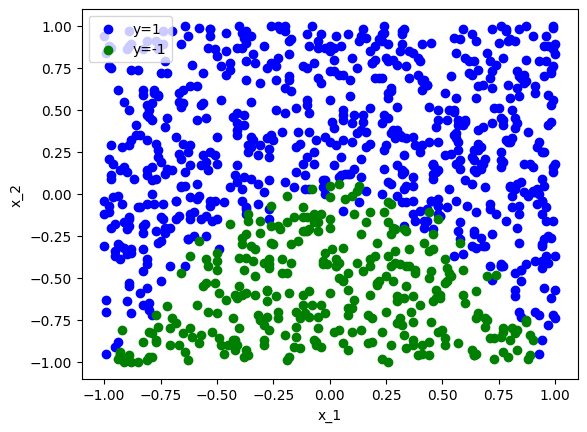

In [43]:
# Visualize the data
plt.figure()
plt.scatter(x[index1, 0], x[index1, 1], color='blue', label='y=1')
plt.scatter(x[index2, 0], x[index2, 1], color='green', label='y=-1')
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## (ii)

In [44]:
clf = LogisticRegression(solver='saga').fit(x, y)
pred = clf.predict(x)
pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

# Get the coefficient and intercept 
coef = clf.coef_[0]
intercept = clf.intercept_

print(coef)
print(intercept)

[0.08625179 5.06703714]
[1.78819287]


## (iii)

In [45]:
# Obtain the decision boundary
x1 = np.linspace(-1, 1, 10)
x2 = (-intercept-x1*coef[0])/coef[1]

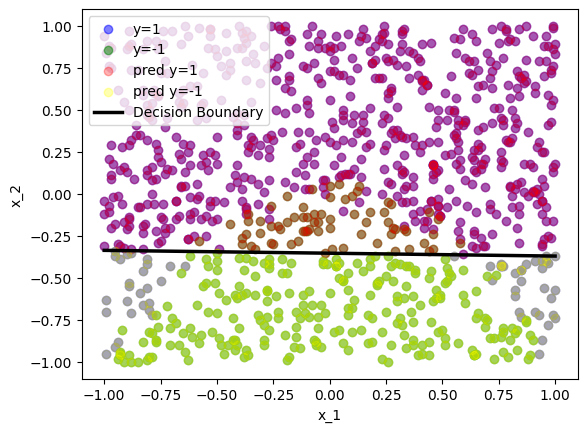

In [46]:
# Visualize the result
plt.figure()
plt.scatter(x[index1, 0], x[index1, 1], color='blue', label='y=1', alpha=0.5)
plt.scatter(x[index2, 0], x[index2, 1], color='green', label='y=-1', alpha=0.5)

plt.scatter(x[pred_index1, 0], x[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
plt.scatter(x[pred_index2, 0], x[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

plt.plot(x1, x2, label='Decision Boundary', color='black', linewidth=2.5)
plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

# (b)

## (i)&(ii)

In [47]:
penalties = [0.001, 0.01, 1, 10, 100, 1000]
accuracies = []

[0.023121   0.45683574]
[0.24587642]
[0.02030266 1.17380565]
[0.41712681]
[0.01637619 1.8494905 ]
[0.64770945]
[0.01657394 1.86614893]
[0.65346945]
[0.01661755 1.86789476]
[0.65407461]
[0.0166215  1.86806845]
[0.65413465]


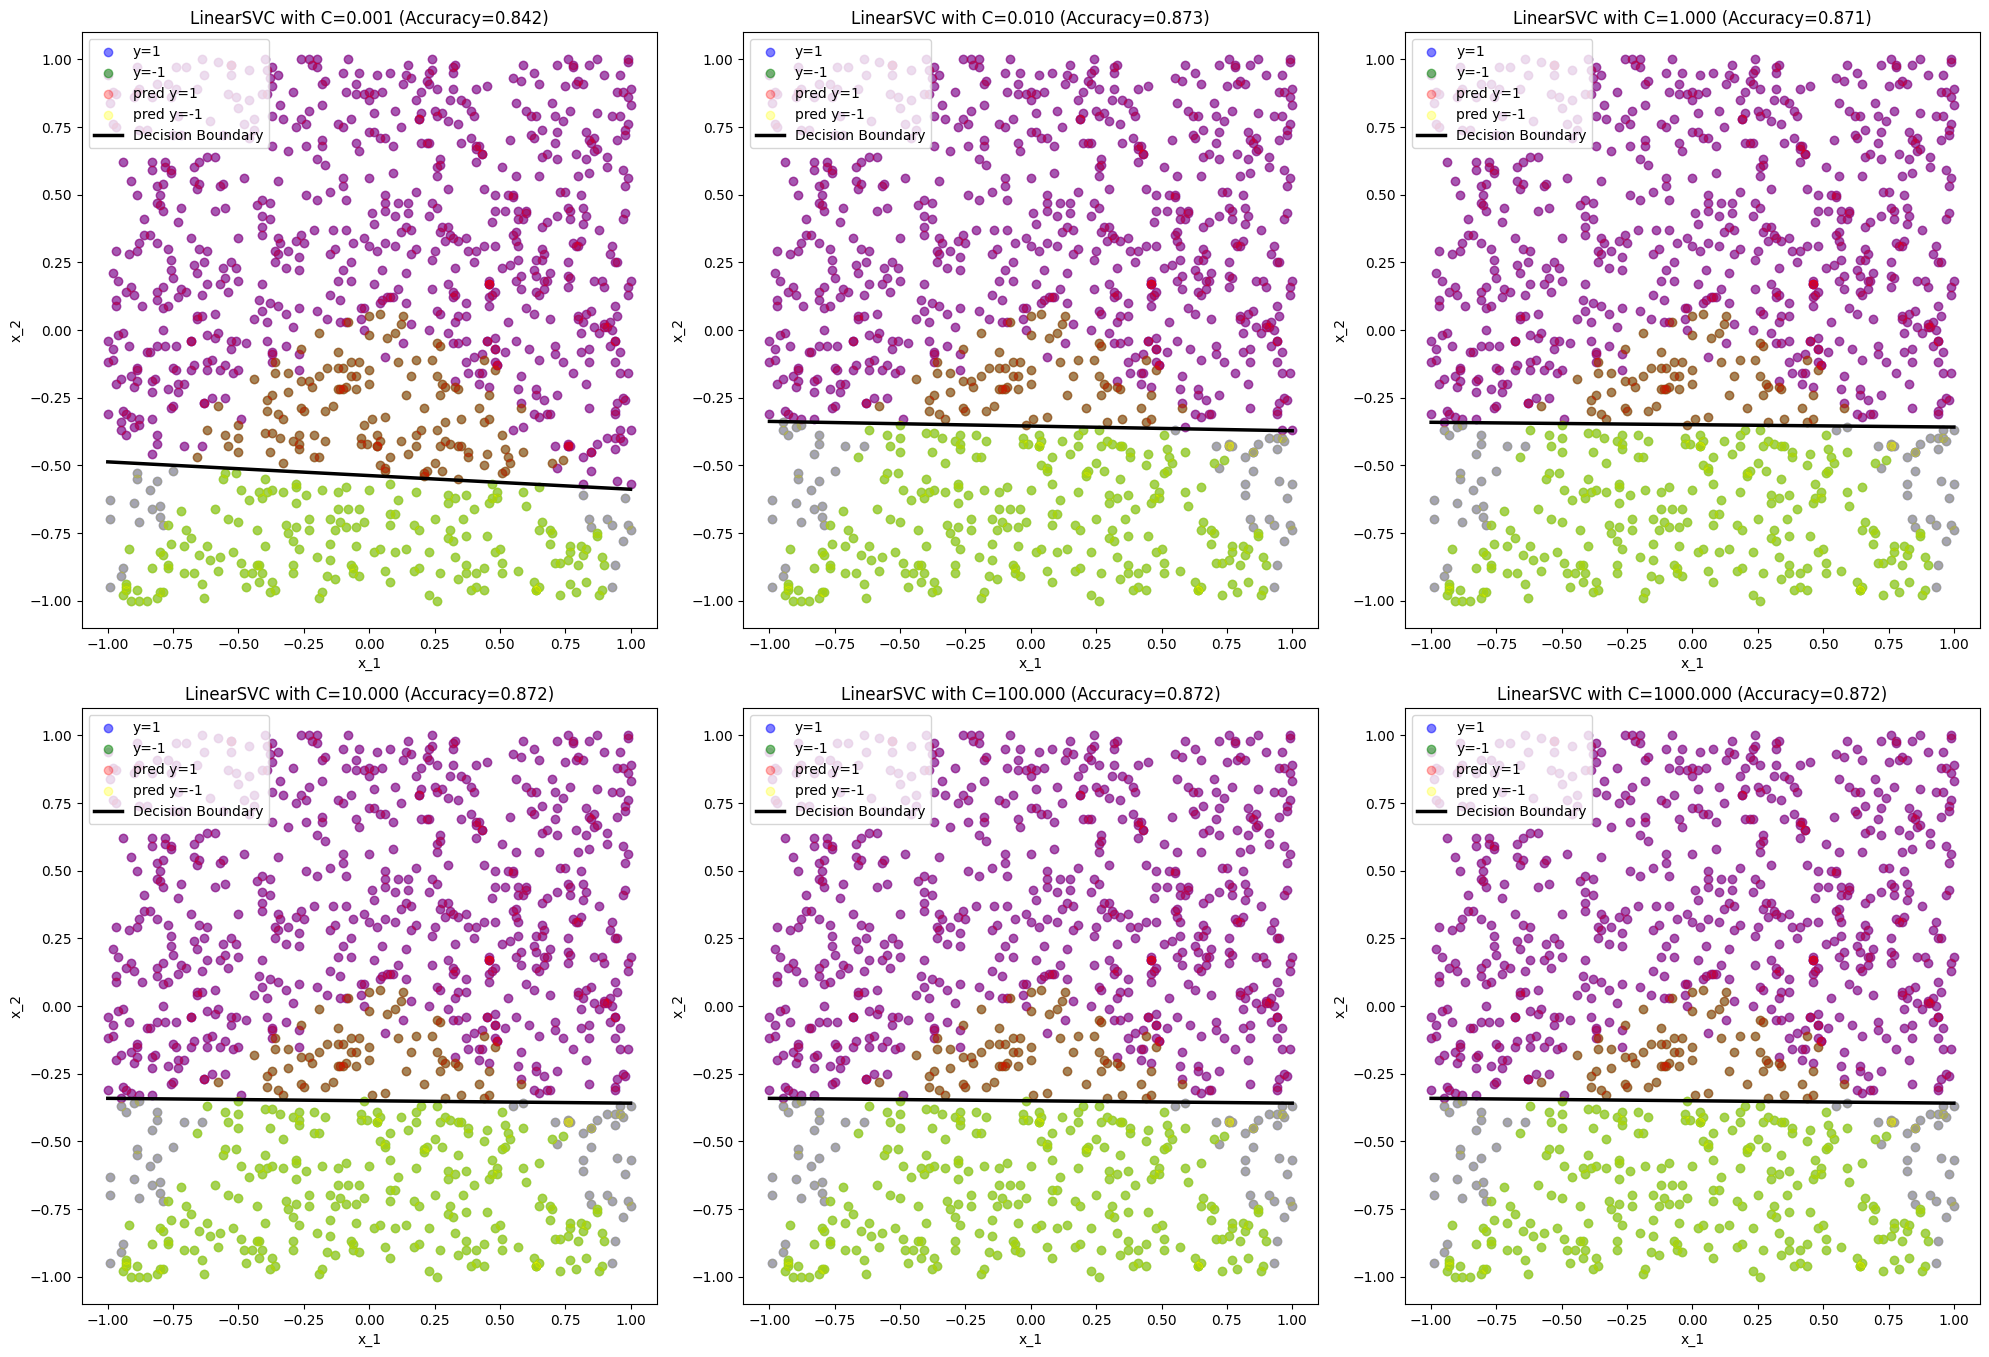

In [48]:
plt.figure(figsize=[20, 20])
for index in np.arange(len(penalties))+1:
    plt.subplot(3, 3, index)
    
    # Model construction
    clf = svm.LinearSVC(C=penalties[index-1],dual=False).fit(x, y)
    
    # Predict the values and calculate the accuracy
    acc = clf.score(x, y)
    accuracies.append(acc)
    pred = clf.predict(x)
    pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
    pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

    # Get the coefficient and intercept to obtain the decision boundary
    coef = clf.coef_[0]
    intercept = clf.intercept_
    print(coef)
    print(intercept)
    
    # Obtain the decision boundary
    x1 = np.linspace(-1, 1, 10)
    x2 = (-intercept-x1*coef[0])/coef[1]
    
    plt.scatter(x[index1, 0], x[index1, 1], color='blue', label='y=1', alpha=0.5)
    plt.scatter(x[index2, 0], x[index2, 1], color='green', label='y=-1', alpha=0.5)

    plt.scatter(x[pred_index1, 0], x[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
    plt.scatter(x[pred_index2, 0], x[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

    plt.plot(x1, x2, label='Decision Boundary', color='black', linewidth=2.5)
    plt.title('LinearSVC with C=%.3f (Accuracy=%.3f)'%(penalties[index-1], acc))
    plt.legend()
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    
plt.tight_layout()
plt.show()

# (c)

## (i)

In [49]:
# Add additional features
x_quad = np.concatenate(([x[:, 0]], [x[:, 1]], [x[:, 0]**2], [x[:, 1]**2])).T

In [50]:
# Fit the model
clf = LogisticRegression(solver='saga').fit(x_quad, y)
score = clf.score(x_quad, y)

In [51]:
# Get the new coefficient and intercept
coef = clf.coef_[0]
intercept = clf.intercept_

print(intercept)
print(coef)
print(score)

[0.38282294]
[ 0.03984831  6.65872478  6.65528419 -1.09161421]
0.960960960960961


## (ii)

In [52]:
pred = clf.predict(x_quad)
pred_index1 = [i for i in range(len(y)) if pred[i] == 1]
pred_index2 = [i for i in range(len(y)) if pred[i] == -1]

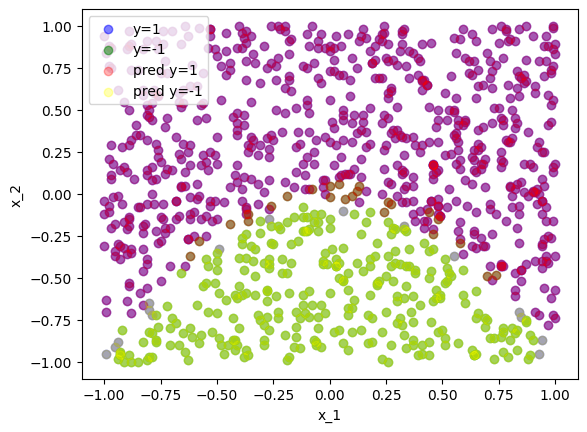

In [53]:
# Visualize the result
plt.figure()
plt.scatter(x[index1, 0], x[index1, 1], color='blue', label='y=1', alpha=0.5)
plt.scatter(x[index2, 0], x[index2, 1], color='green', label='y=-1', alpha=0.5)

plt.scatter(x[pred_index1, 0], x[pred_index1, 1], color='red', label='pred y=1', alpha=0.3)
plt.scatter(x[pred_index2, 0], x[pred_index2, 1], color='yellow', label='pred y=-1', alpha=0.3)

plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()